In [1]:
from keras.applications import vgg16, vgg19, ResNet50
from tensorflow.keras.utils import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [ ]:
!unzip book_covers.zip

# Cargamos VGG16 pre-entrenada en ImageNet


In [2]:
# del práctico 4
modelo_escogido = 'vgg16'

if modelo_escogido == 'vgg16':
  # cargar modelo
  vgg_model = vgg16.VGG16(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()

elif modelo_escogido == 'vgg19':
  # cargar modelo
  vgg19_model = vgg19.VGG19(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg19_model.input, outputs=vgg19_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()



553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

## Procesamiento de imágenes

In [4]:
imgs_path = "content/book_covers/" # ruta de carpeta con portadas

# tamaño del input layer de la red
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10 # cantidad de libros a recomendar

In [5]:
#files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]
files = [imgs_path + f'book_{i}.jpg' for i in range(len(os.listdir(imgs_path)))]
print("total de imagenes:",len(files))

total de imagenes: 4287


In [6]:
files[144]

'content/book_covers/book_144.jpg'

In [7]:
# vamos a procesar cada imagen de portada, cambiándole el tamaño al del input de la red
# y luego pasarla por la red para obtener los features (vectores de 4096 dimensiones) que crea la red
importedImages = []
imgs_features = []
# procesamos por batches si no se llena la memoria
file_batch_size = 500
n_batches = len(files) // file_batch_size
print(f"No. of batches: {n_batches}")

for i, f in enumerate(files):
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

    if i > 0 and i % file_batch_size == 0:
      images = np.vstack(importedImages)
      importedImages = []

      processed_imgs = preprocess_input(images.copy())
      # obtenemos los features para cada imagen del batch con la CNN
      batch_imgs_features = feat_extractor.predict(processed_imgs, batch_size=8)
      print(f"batch {i // file_batch_size} features extracted!")

      imgs_features.append(batch_imgs_features)

# process remaining images
if len(importedImages) > 0:
    images = np.vstack(importedImages)
    processed_imgs = preprocess_input(images.copy())
    # obtenemos los features para cada imagen del batch con la CNN
    batch_imgs_features = feat_extractor.predict(processed_imgs, batch_size=8)
    print(f"remaining images features extracted!")

    imgs_features.append(batch_imgs_features)


No. of batches: 8
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step
batch 1 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step
batch 2 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
batch 3 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step
batch 4 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step
batch 5 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step
batch 6 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step
batch 7 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step
batch 8 features extracted!
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step
remaining images features extracted!


In [8]:
# join all subarrays of imgs_features
imgs_features = np.concatenate(imgs_features, axis=0)
print(imgs_features.shape)

(4287, 4096)


In [9]:
# guardar en npy
np.save("imgs_features_sorted.npy", imgs_features)

## Cargar desde archivo


In [4]:
imgs_features = np.load("imgs_features.npy")

In [10]:
# normalizar
imgs_features = imgs_features / np.linalg.norm(imgs_features, axis=1, keepdims=True)

In [11]:
# computa similaridad coseno entre cada par de features de portadas
cosSimilarities = cosine_similarity(imgs_features)

# guardamos los resultados en un dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df #.head()

,content/book_covers/book_0.jpg,content/book_covers/book_1.jpg,content/book_covers/book_2.jpg,content/book_covers/book_3.jpg,content/book_covers/book_4.jpg,content/book_covers/book_5.jpg,content/book_covers/book_6.jpg,content/book_covers/book_7.jpg,content/book_covers/book_8.jpg,content/book_covers/book_9.jpg,...,content/book_covers/book_4277.jpg,content/book_covers/book_4278.jpg,content/book_covers/book_4279.jpg,content/book_covers/book_4280.jpg,content/book_covers/book_4281.jpg,content/book_covers/book_4282.jpg,content/book_covers/book_4283.jpg,content/book_covers/book_4284.jpg,content/book_covers/book_4285.jpg,content/book_covers/book_4286.jpg
content/book_covers/book_0.jpg,1.000000,0.207102,0.222815,0.321513,0.304316,0.323596,0.172926,0.281892,0.224654,0.278283,...,0.203266,0.224922,0.439019,0.296682,0.301940,0.296179,0.337504,0.273271,0.253476,0.259403
content/book_covers/book_1.jpg,0.207102,1.000000,0.216425,0.296622,0.222928,0.221982,0.374688,0.394338,0.383565,0.316041,...,0.372663,0.242977,0.371717,0.380407,0.296070,0.342386,0.325943,0.553389,0.425339,0.305408
content/book_covers/book_2.jpg,0.222815,0.216425,1.000000,0.228554,0.214853,0.282908,0.167056,0.246032,0.197581,0.213008,...,0.176018,0.156388,0.178024,0.243542,0.204240,0.185024,0.213276,0.272909,0.227131,0.300058
content/book_covers/book_3.jpg,0.321513,0.296622,0.228554,1.000000,0.427507,0.253615,0.395953,0.408764,0.368280,0.355763,...,0.267433,0.393141,0.267863,0.393806,0.398175,0.419847,0.448008,0.269871,0.329739,0.309568
content/book_covers/book_4.jpg,0.304316,0.222928,0.214853,0.427507,1.000000,0.207884,0.226971,0.213271,0.413753,0.473540,...,0.246813,0.447096,0.239808,0.273828,0.264482,0.359278,0.453197,0.308306,0.393578,0.218029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
content/book_covers/book_4282.jpg,0.296179,0.342386,0.185024,0.419847,0.359278,0.341645,0.263397,0.427333,0.450680,0.302797,...,0.383617,0.234616,0.246176,0.483001,0.335426,1.000000,0.412289,0.309596,0.350154,0.317083
content/book_covers/book_4283.jpg,0.337504,0.325943,0.213276,0.448008,0.453197,0.229261,0.401499,0.334862,0.471038,0.441080,...,0.224605,0.552588,0.277013,0.458098,0.319150,0.412289,1.000000,0.332143,0.464227,0.273210
content/book_covers/book_4284.jpg,0.273271,0.553389,0.272909,0.269871,0.308306,0.314382,0.363870,0.427323,0.417724,0.415930,...,0.332641,0.295335,0.363974,0.347782,0.283758,0.309596,0.332143,1.000000,0.470770,0.391901
content/book_covers/book_4285.jpg,0.253476,0.425339,0.227131,0.329739,0.393578,0.292187,0.362859,0.328306,0.448753,0.474692,...,0.265848,0.442565,0.256288,0.514907,0.286664,0.350154,0.464227,0.470770,1.000000,0.421032


In [12]:
# esta funcion imprime las portadas más similares a la dada
def retrieve_most_similar_products(given_img, nb_closest_images=10):

    print("-----------------------------------------------------------------------")
    print("libro escogido:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("libros más similares:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("score de similaridad : ",closest_imgs_scores[i])

# esta devuelve las nb_closest_images portadas y sus similitudes del coseno
def recommend(given_index, nb_closest_images=10):

    closest_imgs = cos_similarities_df[given_index].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_index].sort_values(ascending=False)[1:nb_closest_images+1]

    closest_imgs = closest_imgs.to_numpy()
    closest_imgs_scores = closest_imgs_scores.to_numpy()
    # creamos el array con pares (filename, score)
    recs = [(img, score) for img, score in zip(closest_imgs, closest_imgs_scores)]

    return recs

2971
content/book_covers/book_2971.jpg
-----------------------------------------------------------------------
libro escogido:


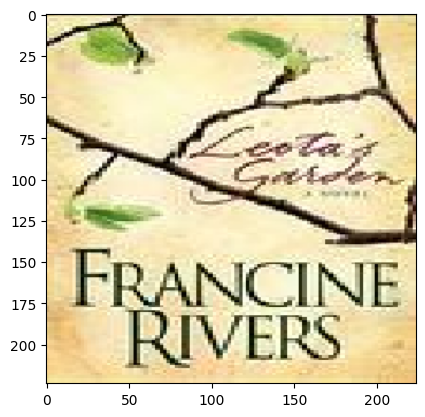

-----------------------------------------------------------------------
libros más similares:


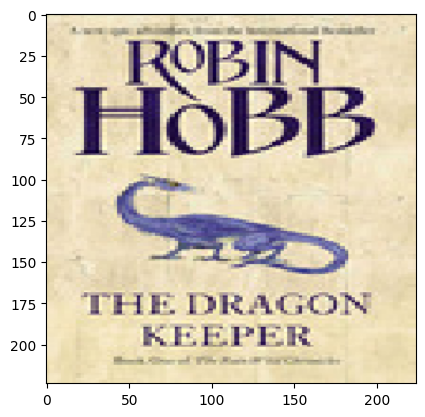

score de similaridad :  0.6206429


/tmp/ipython-input-12-1248398786.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("score de similaridad : ",closest_imgs_scores[i])


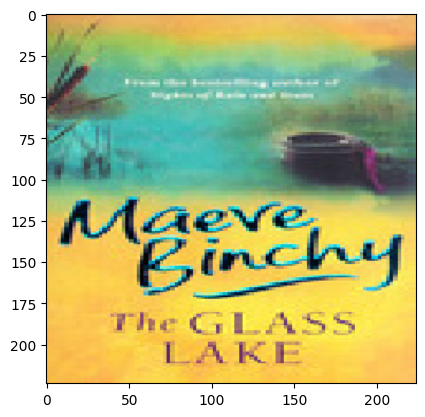

score de similaridad :  0.6162757


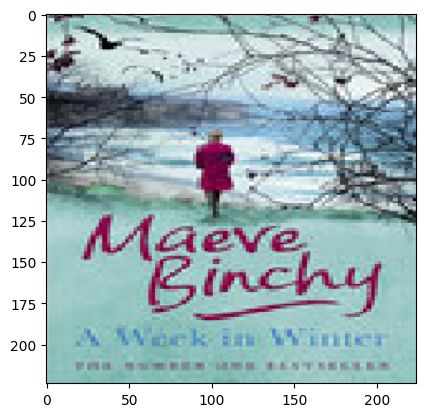

score de similaridad :  0.6056367


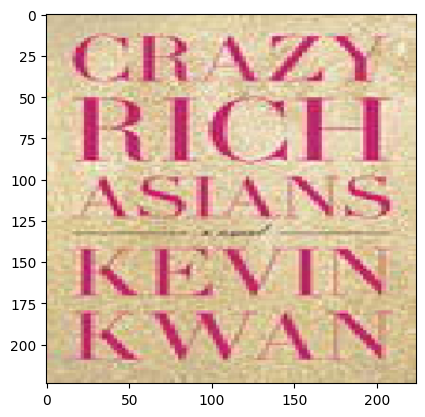

score de similaridad :  0.6029517


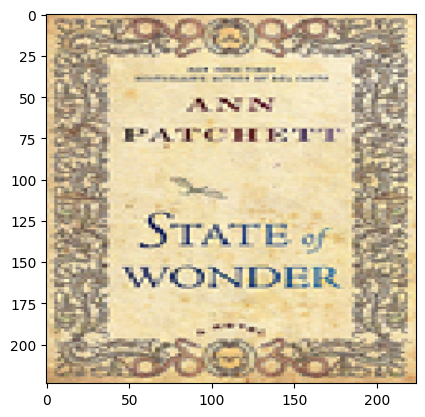

score de similaridad :  0.5847958


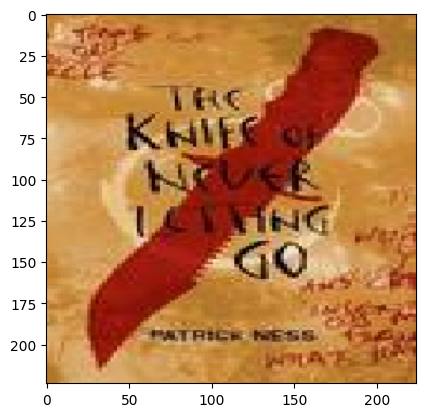

score de similaridad :  0.5808873


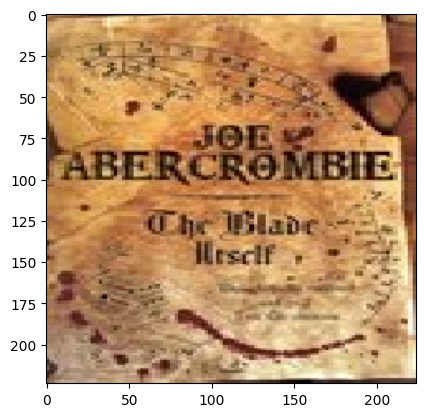

score de similaridad :  0.58015984


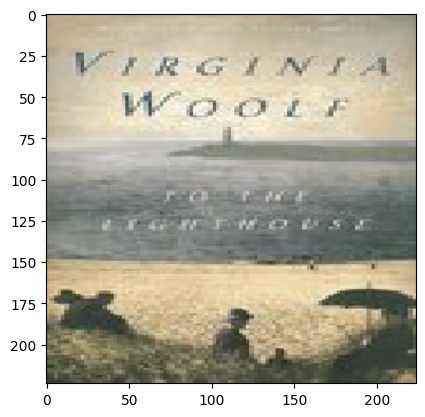

score de similaridad :  0.57190704


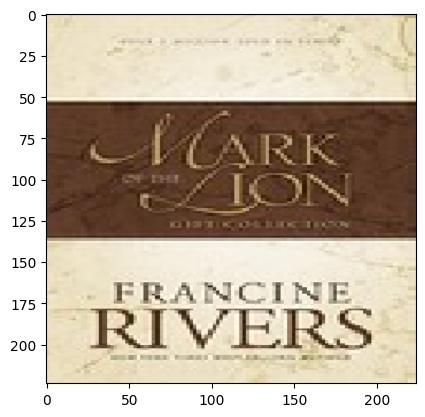

score de similaridad :  0.569104


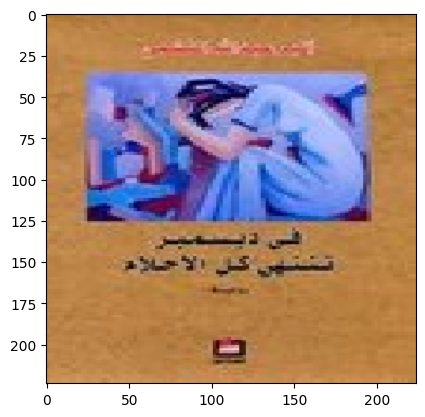

score de similaridad :  0.56352884


In [13]:
import random
idx = random.randint(0, len(files))
print(idx)
idx_recs = recommend(files[idx])
print(files[idx])
retrieve_most_similar_products(files[idx])

In [14]:
print(idx_recs[0], idx_recs[0][0])
idx_0 = int(idx_recs[0][0].strip('content/book_covers/').strip('.jpg'))
print(idx_0)

('content/book_covers/book_2653.jpg', np.float32(0.6206429)) content/book_covers/book_2653.jpg
2653


# Cargar datos de libros

In [ ]:
!wget https://www.dropbox.com/s/57tel5zqopkssrh/books.csv?dl=0 -O books.csv
!wget https://www.dropbox.com/s/zpnnoy1i8ljf9fg/goodreads_bert_embeddings.npy?dl=0 -O goodreads_bert_embeddings.npy
!wget https://www.dropbox.com/s/dqeqpsr0vdvmcy0/goodreads_past_interactions.json?dl=0 -O goodreads_past_interactions.json
!wget https://www.dropbox.com/s/rjtzhmb2zbpp30q/goodreads_test_interactions.json?dl=0 -O goodreads_test_interactions.json

Creamos los diccionarios que convierten user_id en su índice de los arreglos y al revés.

In [17]:
import json

df_books = pd.read_csv('books.csv', sep=',')

idx2bookid = {i: id_ for i, id_ in enumerate(df_books.book_id)}
bookid2idx = {id_:i for i, id_ in enumerate(df_books.book_id)}

with open("goodreads_past_interactions.json", "r") as f:
    user_interactions = json.load(f)

idx2userid = {i: id_ for i, id_ in enumerate(user_interactions.keys())}
userid2idx = {id_:i for i, id_ in enumerate(user_interactions.keys())}

with open("goodreads_test_interactions.json", "r") as f:
    user_interactions_test = json.load(f)

Ahora cargamos los embeddings generados por BERT

In [18]:
bert_embeddings = np.load("goodreads_bert_embeddings.npy")  # shape: (num_items, embedding_dim)

num_items, embedding_dim = bert_embeddings.shape

print(bert_embeddings.shape)

(4287, 768)


In [19]:
# normalizar embeddings
bert_embeddings = bert_embeddings / np.linalg.norm(bert_embeddings, axis=1, keepdims=True)

## Crear datos de entrenamiento y testeo

In [20]:
from scipy.sparse import coo_matrix
rows = []
cols = []
data = []

for user_id, book_ids in user_interactions.items():
    for book_id in book_ids:
        u_id = userid2idx[user_id]
        b_id = bookid2idx[book_id]
        rows.append(int(u_id))
        cols.append(int(b_id))
        data.append(1)

max_user_id = max(rows)
max_item_id = max(cols)

# Crear matriz sparse
user_item_matrix_train = coo_matrix((data, (rows, cols)), shape=(max_user_id + 1, max_item_id + 1))
print(user_item_matrix_train.shape)

rows_test = []
cols_test = []
data_test = []

for user_id, book_ids in user_interactions_test.items():
    for book_id in book_ids:
        u_id = userid2idx[user_id]
        b_id = bookid2idx[book_id]
        rows_test.append(int(u_id))
        cols_test.append(int(b_id))
        data_test.append(1)

max_user_id = max([max_user_id] + rows_test)
max_item_id = max([max_item_id] + cols_test)

test_users = list(set(rows_test))

# Crear matriz sparse
user_item_matrix_test = coo_matrix((data_test, (rows_test, cols_test)), shape=(max_user_id + 1, max_item_id + 1))
print(user_item_matrix_test.shape)

(52821, 4287)
(52821, 4287)


# Crear user features

El user feature es

$$ e_u =  \sum_{b \in B_u} \frac{e_b}{|B_u|} $$

In [21]:
user_features = {}
for user in user_interactions_test:
  user_books = user_interactions[user]
  user_embedding = np.zeros(embedding_dim)
  for book in user_books:
    book_embedding = bert_embeddings[bookid2idx[book]]
    user_embedding += book_embedding
  user_embedding /= len(user_books)
  user_features[user] = user_embedding

Repetimos lo que hicimos con las imágenes, pero ahora las similitudes son entre cada usuario (el embedding que acabamos de generar) y cada libro (su embedding de BERT).

In [22]:
# computa similaridad coseno entre los features de los usuarios y de las imagenes
user_cosSimilarities = cosine_similarity(list(user_features.values()), bert_embeddings)
index = [int(key) for key in user_features.keys()]
columns = [i for i in range(num_items)]
# guardamos los resultados en un dataframe
user_cos_similarities_df = pd.DataFrame(user_cosSimilarities, columns=columns, index=index)
user_cos_similarities_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286
46133,0.793900,0.863383,0.859704,0.790283,0.682819,0.813969,0.768873,0.858456,0.411478,0.838240,...,0.424127,0.635854,0.593257,0.808955,0.840748,0.689081,0.882428,0.862994,0.763771,0.833437
53292,0.815001,0.865782,0.885316,0.844766,0.748829,0.858450,0.821114,0.903925,0.455143,0.850037,...,0.468750,0.693739,0.662817,0.865505,0.827727,0.747329,0.866147,0.841652,0.804055,0.849643
13282,0.806598,0.863063,0.876649,0.817485,0.709276,0.841910,0.785602,0.881423,0.439714,0.850788,...,0.447977,0.658514,0.626381,0.838227,0.831892,0.713522,0.875048,0.850797,0.784329,0.846654
45554,0.817268,0.840695,0.880370,0.855650,0.766113,0.855446,0.829919,0.908325,0.471470,0.851450,...,0.486081,0.715930,0.696675,0.884511,0.816692,0.767599,0.840599,0.820955,0.818514,0.844661
31001,0.821526,0.857859,0.883983,0.850505,0.768976,0.848414,0.831100,0.904967,0.463804,0.845810,...,0.486527,0.696407,0.674320,0.869554,0.830300,0.763608,0.855066,0.833974,0.821477,0.830384


## Recomendar usando features combinados

Ahora concatenaremos los features de las imágenes con los embeddings de BERT.

In [23]:
# creamos features nuevos, donde para cada libro tenemos
# embedding = (image_features, bert_embeddings)
book_combined_embeddings = np.concatenate((imgs_features, bert_embeddings), axis=1)
print(book_combined_embeddings.shape)

(4287, 4864)


Creamos los embeddings/features de cada usuario al igual que antes, pero ahora $e_b$ representa el vector concatenado.

In [25]:
user_combined_features = {}
for user in user_interactions_test:
  user_books = user_interactions[user]
  user_embedding = np.zeros(embedding_dim + 4096) # nueva dimensión del vector
  for book in user_books:
    book_embedding = book_combined_embeddings[bookid2idx[book]]
    user_embedding += book_embedding
  user_embedding /= len(user_books)
  user_combined_features[user] = user_embedding

In [26]:
# computa similaridad coseno entre los features de los usuarios y de las imagenes
user_combined_cosSimilarities = cosine_similarity(list(user_combined_features.values()), book_combined_embeddings)
index = [int(key) for key in user_combined_features.keys()]
columns = [i for i in range(num_items)]
# guardamos los resultados en un dataframe
user_combinedcos_similarities_df = pd.DataFrame(user_combined_cosSimilarities, columns=columns, index=index)
user_combinedcos_similarities_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286
46133,0.647442,0.731166,0.679815,0.668234,0.604132,0.675740,0.645345,0.737064,0.476476,0.707006,...,0.447443,0.555054,0.518108,0.710085,0.686304,0.625188,0.736319,0.771817,0.701007,0.708898
53292,0.659627,0.744293,0.687845,0.725007,0.655665,0.704221,0.698158,0.776341,0.518744,0.729754,...,0.460713,0.607319,0.560196,0.771850,0.686694,0.674471,0.757334,0.751848,0.746035,0.724743
13282,0.659885,0.730350,0.692743,0.696203,0.624429,0.694715,0.664423,0.755257,0.503562,0.727952,...,0.449629,0.585340,0.533844,0.737077,0.688478,0.636383,0.748878,0.755631,0.727265,0.727227
45554,0.661649,0.713873,0.669704,0.734358,0.678353,0.698032,0.691770,0.775443,0.528453,0.741802,...,0.460163,0.632637,0.569623,0.778127,0.675135,0.690965,0.745686,0.728046,0.754622,0.721649
31001,0.668783,0.737420,0.671190,0.727636,0.680510,0.700292,0.697615,0.769314,0.514664,0.743810,...,0.472210,0.610260,0.562530,0.767917,0.679890,0.689027,0.743429,0.755577,0.759182,0.707038


## Ahora usamos PCA sobre los features combinados

In [29]:
from sklearn.decomposition import PCA
n_components=800
pca_book_combined_embeddings = PCA(n_components=n_components).fit_transform(book_combined_embeddings)

print(pca_book_combined_embeddings.shape)

(4287, 800)


In [30]:
# guardamos los features de PCA
np.save("pca_800_book_combined_sorted.npy", pca_book_combined_embeddings)

In [31]:
# normalizar
pca_book_combined_embeddings = pca_book_combined_embeddings / np.linalg.norm(pca_book_combined_embeddings, axis=1, keepdims=True)

In [32]:
dim = pca_book_combined_embeddings.shape[1]
user_pca_combined_features = {}
for user in user_interactions_test:
  user_books = user_interactions[user]
  user_embedding = np.zeros(dim)
  for book in user_books:
    book_embedding = pca_book_combined_embeddings[bookid2idx[book]]
    user_embedding += book_embedding
  user_embedding /= len(user_books)
  user_pca_combined_features[user] = user_embedding

In [33]:
# computa similaridad coseno entre los features de los usuarios y de las imagenes
user_pca_combined_cosSimilarities = cosine_similarity(list(user_pca_combined_features.values()), pca_book_combined_embeddings)
index = [int(key) for key in user_pca_combined_features.keys()]
columns = [i for i in range(num_items)]
# guardamos los resultados en un dataframe
user_pca_combinedcos_similarities_df = pd.DataFrame(user_pca_combined_cosSimilarities, columns=columns, index=index)
user_pca_combinedcos_similarities_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286
46133,-0.010408,0.113911,0.105727,-0.172870,-0.251745,-0.082793,-0.135657,-0.060581,-0.152976,-0.161857,...,-0.064827,-0.196568,-0.171755,-0.218027,0.083674,-0.263114,0.014020,0.214179,-0.244875,-0.005467
53292,-0.003563,0.225144,0.152198,0.272491,0.002749,0.059307,0.261492,0.277834,0.024010,-0.186844,...,-0.086962,0.101127,0.020199,0.287783,0.008681,-0.034637,0.145424,-0.078616,-0.026231,0.031364
13282,0.030137,0.061427,0.184790,-0.032936,-0.218182,-0.007184,-0.075967,0.020975,-0.060669,-0.096543,...,-0.110177,-0.068758,-0.155824,-0.109829,0.061686,-0.318032,0.067023,0.037189,-0.151634,0.094186
45554,0.054802,-0.099921,-0.016600,0.335797,0.249848,0.024592,0.176404,0.226694,0.137364,0.043214,...,-0.034429,0.323158,0.124720,0.313680,-0.061727,0.161658,0.024080,-0.262902,0.121185,0.034884
31001,0.100827,0.136738,-0.029515,0.273666,0.277720,0.020557,0.228121,0.164001,0.011059,0.044203,...,0.034503,0.123586,0.045032,0.208949,-0.041166,0.147926,-0.020368,0.017934,0.167144,-0.156346


## Funciones recomendadoras

Definimos las funciones que actúan como el modelo recomendador (para vectores completos y los procesados con PCA).

In [34]:
def bert_rec_func(users, N=10):
  recs_combined = []
  for user in users:
    user = idx2userid[user]
    user_recs = user_cos_similarities_df.loc[int(user)].sort_values(ascending=False)[:N].index.values
    recs_combined.append(user_recs)
  return recs_combined

def combined_rec_func(users, N=10):
  recs_combined = []
  for user in users:
    user = idx2userid[user]
    user_recs = user_combinedcos_similarities_df.loc[int(user)].sort_values(ascending=False)[:N].index.values
    recs_combined.append(user_recs)
  return recs_combined

def pca_combined_rec_func(users, N=10):
  recs_pca_combined = []
  for user in users:
    user = idx2userid[user]
    user_recs = user_pca_combinedcos_similarities_df.loc[int(user)].sort_values(ascending=False)[:N].index.values
    recs_pca_combined.append(user_recs)
  return recs_pca_combined

# Evaluación

In [35]:
def custom_ranking_metrics_at_k(rec_func, train_user_items, test_user_items, K=10, show_progress=False):

    # Ensure matrices are in CSR format
    train_user_items = train_user_items.tocsr()
    test_user_items = test_user_items.tocsr()

    num_users, num_items = test_user_items.shape
    relevant = 0
    total_precision_div = 0
    total_map = 0
    total_ndcg = 0
    total_auc = 0
    total_users = 0

    # Compute cumulative gain for NDCG normalization
    cg = 1.0 / np.log2(np.arange(2, K + 2))  # Discount factor
    cg_sum = np.cumsum(cg)  # Ideal DCG normalization

    # Get users with at least one item in the test set
    users_with_test_data = np.where(np.diff(test_user_items.indptr) > 0)[0]

    # Progress bar
    #progress = tqdm.tqdm(total=len(users_with_test_data), disable=not show_progress)

    batch_size = 1000
    start_idx = 0
    #recs = []

    while start_idx < len(users_with_test_data):
        batch_users = users_with_test_data[start_idx:start_idx + batch_size]
        recommended_items = rec_func(batch_users, N=K)
        #recs.append(recommended_items)
        start_idx += batch_size

        for user_idx, user_id in enumerate(batch_users):
            test_items = set(test_user_items.indices[test_user_items.indptr[user_id]:test_user_items.indptr[user_id + 1]])

            if not test_items:
                continue  # Skip users without test data

            num_relevant = len(test_items)
            total_precision_div += min(K, num_relevant)

            ap = 0
            hit_count = 0
            auc = 0
            idcg = cg_sum[min(K, num_relevant) - 1]  # Ideal Discounted Cumulative Gain (IDCG)
            num_negative = num_items - num_relevant

            for rank, item in enumerate(recommended_items[user_idx]):
                if item in test_items:
                    relevant += 1
                    hit_count += 1
                    ap += hit_count / (rank + 1)
                    total_ndcg += cg[rank] / idcg
                else:
                    auc += hit_count  # Accumulate hits for AUC calculation

            auc += ((hit_count + num_relevant) / 2.0) * (num_negative - (K - hit_count))
            total_map += ap / min(K, num_relevant)
            total_auc += auc / (num_relevant * num_negative)
            total_users += 1

        #progress.update(len(batch_users))

    #progress.close()

    # Compute final metrics
    precision = relevant / total_precision_div if total_precision_div > 0 else 0
    mean_ap = total_map / total_users if total_users > 0 else 0
    mean_ndcg = total_ndcg / total_users if total_users > 0 else 0
    mean_auc = total_auc / total_users if total_users > 0 else 0

    return {
        "precision": precision,
        "map": mean_ap,
        "ndcg": mean_ndcg,
        "auc": mean_auc
    }

In [36]:
ks = [5, 10, 20]

for k in ks:
  print(f'Metrics @{k} using user bert embeddings: \n\t {custom_ranking_metrics_at_k(bert_rec_func, user_item_matrix_train, user_item_matrix_test, K=k)}')
  print(f'Metrics @{k} using combined user features: \n\t {custom_ranking_metrics_at_k(combined_rec_func, user_item_matrix_train, user_item_matrix_test, K=k)}')
  print(f'Metrics @{k} using combined user features (PCA with {n_components} components): \n\t {custom_ranking_metrics_at_k(pca_combined_rec_func, user_item_matrix_train, user_item_matrix_test, K=k)}')

# calcular auc normal
metrics = custom_ranking_metrics_at_k(bert_rec_func, user_item_matrix_train, user_item_matrix_test, K=max_item_id)
auc = metrics['auc']
print(f'AUC bert embeddings: {auc}')

metrics = custom_ranking_metrics_at_k(combined_rec_func, user_item_matrix_train, user_item_matrix_test, K=max_item_id)
auc = metrics['auc']
print(f'AUC combined user features: {auc}')

metrics = custom_ranking_metrics_at_k(pca_combined_rec_func, user_item_matrix_train, user_item_matrix_test, K=max_item_id)
auc = metrics['auc']
print(f'AUC combined user features (PCA with {n_components} components): {auc}')

Metrics @5 using user bert embeddings: 
	 {'precision': 0.004, 'map': 0.0016666666666666668, 'ndcg': np.float64(0.0038356636737133564), 'auc': 0.5004180500350724}
Metrics @5 using combined user features: 
	 {'precision': 0.016, 'map': 0.0058, 'ndcg': np.float64(0.014104919136482067), 'auc': 0.5034243628711724}
Metrics @5 using combined user features (PCA with 800 components): 
	 {'precision': 0.014, 'map': 0.007066666666666668, 'ndcg': np.float64(0.014852285551163224), 'auc': 0.5029238952536836}
Metrics @10 using user bert embeddings: 
	 {'precision': 0.004, 'map': 0.0011111111111111111, 'ndcg': np.float64(0.00393560819455659), 'auc': 0.5008361000701422}
Metrics @10 using combined user features: 
	 {'precision': 0.013, 'map': 0.003694444444444444, 'ndcg': np.float64(0.01262448464022132), 'auc': 0.5053472059855035}
Metrics @10 using combined user features (PCA with 800 components): 
	 {'precision': 0.014, 'map': 0.00447063492063492, 'ndcg': np.float64(0.014627096215830835), 'auc': 0.505

Metrics @5 using user bert embeddings:
	 {'precision': 0.004, 'map': 0.0016666666666666668, 'ndcg': np.float64(0.0038356636737133564), 'auc': 0.5004180500350724}
Metrics @5 using combined user features:
	 {'precision': 0.016, 'map': 0.0058, 'ndcg': np.float64(0.014104919136482067), 'auc': 0.5034243628711724}
Metrics @5 using combined user features (PCA with 800 components):
	 {'precision': 0.014, 'map': 0.007066666666666668, 'ndcg': np.float64(0.014852285551163224), 'auc': 0.5029238952536836}

Metrics @10 using user bert embeddings:
	 {'precision': 0.004, 'map': 0.0011111111111111111, 'ndcg': np.float64(0.00393560819455659), 'auc': 0.5008361000701422}
Metrics @10 using combined user features:
	 {'precision': 0.013, 'map': 0.003694444444444444, 'ndcg': np.float64(0.01262448464022132), 'auc': 0.5053472059855035}
Metrics @10 using combined user features (PCA with 800 components):
	 {'precision': 0.014, 'map': 0.00447063492063492, 'ndcg': np.float64(0.014627096215830835), 'auc': 0.5058480243161092}

Metrics @20 using user bert embeddings:
	 {'precision': 0.013, 'map': 0.001737314319667261, 'ndcg': np.float64(0.00879285529438151), 'auc': 0.5041699789572125}
Metrics @20 using combined user features:
	 {'precision': 0.017, 'map': 0.0039394230769230765, 'ndcg': np.float64(0.014760209447608315), 'auc': 0.5061921907879349}
Metrics @20 using combined user features (PCA with 800 components):
	 {'precision': 0.022, 'map': 0.00509827384517787, 'ndcg': np.float64(0.019065575914873976), 'auc': 0.5086960486322184}

AUC bert embeddings: 0.6097537993920971

AUC combined user features: 0.5964477437456163

AUC combined user features (PCA with 800 components): 0.7150168342296002

## Diversity

In [37]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compute_ild_at_k(rec_func, user_item_matrix_train, book_embeddings, K=10, user_ids=None):
    """
    Compute Intra-List Diversity at K (ILD@K) for given users.

    Parameters:
    -----------
    model : trained implicit model (ALS, BPR, etc.)
    user_item_matrix_train : scipy.sparse.csr_matrix
        Training user-item matrix.
    book_embeddings : np.ndarray
        Embeddings of books; shape = (num_books, embedding_dim)
    K : int
        Number of top recommendations to consider.
    user_ids : list of ints
        Subset of user indices to evaluate on. If None, all users are used.

    Returns:
    --------
    float
        Average ILD@K over the selected users.
    """
    num_users = user_item_matrix_train.shape[0]
    if user_ids is None:
        user_ids = range(num_users)

    ild_scores = []

    for user_id in user_ids:
        # Get top-K recommended book indices
        ids = rec_func([user_id], N=K)
        #recommended_ids = [idx for idx, _ in recommended]
        recommended_ids = ids[0]

        if len(recommended_ids) < 2:
            print('skip')
            continue  # skip ILD computation for users with < 2 recommendations

        # Get the corresponding embeddings
        emb_list = book_embeddings[recommended_ids]

        # Compute cosine similarity matrix (K x K)
        sim_matrix = cosine_similarity(emb_list)

        # Exclude self-similarities (diagonal)
        upper_tri_indices = np.triu_indices_from(sim_matrix, k=1)
        pairwise_sims = sim_matrix[upper_tri_indices]

        # Compute ILD: average (1 - sim)
        ild = np.mean(1 - pairwise_sims)
        ild_scores.append(ild)

    return np.mean(ild_scores) if ild_scores else 0.0

In [38]:
test_user_ids = np.where(np.diff(user_item_matrix_test.tocsr().indptr) > 0)[0]
for k in ks:
  print(f'ILD@{k} using user bert embeddings: \n\t {compute_ild_at_k(bert_rec_func, user_item_matrix_train, bert_embeddings, K=k, user_ids=test_user_ids)}')
  print(f'ILD@{k} using combined user features: \n\t {compute_ild_at_k(combined_rec_func, user_item_matrix_train, book_combined_embeddings, K=k, user_ids=test_user_ids)}')
  print(f'ILD@{k} using combined user features (PCA with {n_components} components): \n\t {compute_ild_at_k(pca_combined_rec_func, user_item_matrix_train, pca_book_combined_embeddings, K=k, user_ids=test_user_ids)}')

ILD@5 using user bert embeddings: 
	 0.141432907499709
ILD@5 using combined user features: 
	 0.3137680672489392
ILD@5 using combined user features (PCA with 800 components): 
	 0.700239948748024
ILD@10 using user bert embeddings: 
	 0.14686169582351763
ILD@10 using combined user features: 
	 0.3206004480414797
ILD@10 using combined user features (PCA with 800 components): 
	 0.7250266413298097
ILD@20 using user bert embeddings: 
	 0.1540923668815861
ILD@20 using combined user features: 
	 0.3289911152309082
ILD@20 using combined user features (PCA with 800 components): 
	 0.7500838907218746


ILD@5 using user bert embeddings:
	 0.141432907499709
ILD@5 using combined user features:
	 0.3137680672489392
ILD@5 using combined user features (PCA with 800 components):
	 0.700239948748024

ILD@10 using user bert embeddings:
	 0.14686169582351763
ILD@10 using combined user features:
	 0.3206004480414797
ILD@10 using combined user features (PCA with 800 components):
	 0.7250266413298097
   
ILD@20 using user bert embeddings:
	 0.1540923668815861
ILD@20 using combined user features:
	 0.3289911152309082
ILD@20 using combined user features (PCA with 800 components):
	 0.7500838907218746

## Novelty

In [39]:
from collections import Counter

# Flatten user-book pairs in the training set
all_train_pairs = [(u, i) for u, i_list in user_interactions.items() for i in i_list]

# Count how many times each book was interacted with
pop_counter = Counter(i for _, i in all_train_pairs)

# Get the maximum popularity to normalize
max_pop = max(pop_counter.values())

In [40]:
import numpy as np

def novelty_at_k(topk_items, pop_counter, max_pop, k):
    """
    Computes novelty@K given a top-k list of recommended items.

    Parameters:
    -----------
    topk_items : list of book_ids (not indices)
    pop_counter : Counter of book_id -> interaction count
    max_pop : int
        Max value in pop_counter for normalization
    k : int

    Returns:
    --------
    float
        Novelty@K score
    """
    pops = np.array([pop_counter.get(i, 0) for i in topk_items[:k]], dtype=np.float32)
    return np.mean(1.0 - pops / max_pop)

def average_novelty(rec_func, user_item_matrix_train, user_ids, pop_counter, max_pop, k=10):
    """
    Computes average novelty@K across test users.

    Parameters:
    -----------
    model : trained implicit model
    user_item_matrix_train : csr_matrix
    user_interactions_test : dict
        Mapping of external user_id to test books
    pop_counter : Counter
    max_pop : int
    k : int

    Returns:
    --------
    float
        Average novelty@K
    """
    novelty_scores = []

    for user_id in user_ids:

        # Recommend top-k items (internal indices)
        ids = rec_func([user_id], N=k)
        recommended_ids = ids[0]

        novelty = novelty_at_k(recommended_ids, pop_counter, max_pop, k)
        novelty_scores.append(novelty)

    return np.mean(novelty_scores) if novelty_scores else 0.0


In [41]:
for k in ks:
  print(f'Novelty@{k} using user bert embeddings: \n\t {average_novelty(bert_rec_func, user_item_matrix_train, test_user_ids, pop_counter, max_pop, k=k)}')
  print(f'Novelty@{k} using combined user features: \n\t {average_novelty(combined_rec_func, user_item_matrix_train, test_user_ids, pop_counter, max_pop, k=k)}')
  print(f'Novelty@{k} using combined user features (PCA with {n_components} components): \n\t {average_novelty(pca_combined_rec_func, user_item_matrix_train, test_user_ids, pop_counter, max_pop, k=k)}')

Novelty@5 using user bert embeddings: 
	 0.9625094532966614
Novelty@5 using combined user features: 
	 0.9707251191139221
Novelty@5 using combined user features (PCA with 800 components): 
	 0.9455358386039734
Novelty@10 using user bert embeddings: 
	 0.9623212218284607
Novelty@10 using combined user features: 
	 0.9731289744377136
Novelty@10 using combined user features (PCA with 800 components): 
	 0.9527543783187866
Novelty@20 using user bert embeddings: 
	 0.9598309993743896
Novelty@20 using combined user features: 
	 0.9759033918380737
Novelty@20 using combined user features (PCA with 800 components): 
	 0.9532042741775513


Novelty@5 using user bert embeddings:
	 0.9625094532966614
Novelty@5 using combined user features:
	 0.9707251191139221
Novelty@5 using combined user features (PCA with 800 components):
	 0.9455358386039734

Novelty@10 using user bert embeddings:
	 0.9623212218284607
Novelty@10 using combined user features:
	 0.9731289744377136
Novelty@10 using combined user features (PCA with 800 components):
	 0.9527543783187866
   
Novelty@20 using user bert embeddings:
	 0.9598309993743896
Novelty@20 using combined user features:
	 0.9759033918380737
Novelty@20 using combined user features (PCA with 800 components):
	 0.9532042741775513